In [52]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import skimage.io
from matplotlib.colors import ListedColormap

In [ ]:
# If needed, retrieve volume from QIM data repository.

import os
if not os.path.isdir('nerves_data'):
    !wget -q https://qim.compute.dtu.dk/data-repository/nerves_data.zip

    # Unzip the file to the current directory
    import shutil
    shutil.unpack_archive('nerves_data.zip', 'nerves_data')

In [53]:
SLICE = 'nerves_data/NT2_crop_slices/slice_099.tif'
ANNOTATIONS_ROOT = 'nerves_data/annotations/Part01/'

label_colors = 255 * np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])

def annotations_to_labels(annotated_image):
    
    difs = annotated_image[..., :3].reshape(-1, 1, 3)  - label_colors[None]
    dist = (difs**2).sum(axis=2)
    return dist.argmin(axis=1).reshape(annotated_image.shape[:2])

def labels_to_onehot(label):
    oh =np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    return oh[label]

imfiles = sorted(glob.glob(f'{ANNOTATIONS_ROOT}*.png'))
images = [skimage.io.imread(imfile) for imfile in imfiles]
labels = [annotations_to_labels(i) for i in images]
layers = [labels_to_onehot(l) for l in labels]


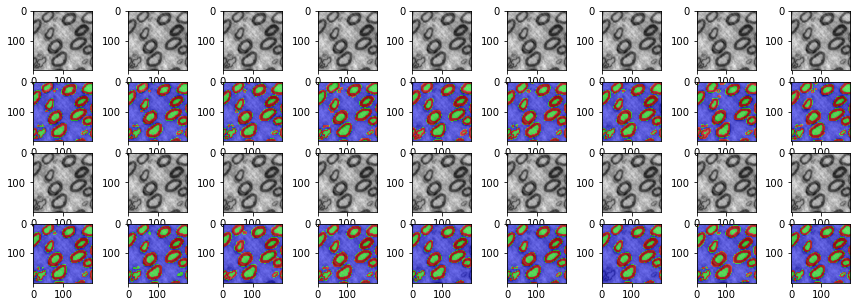

In [54]:
# Visualize the labeling.
rgbcmap = ListedColormap(np.array([[0,0,1.,1.], [0,1.,0,1.], [1.,0,0,1.]]))
im_org = skimage.io.imread(SLICE)

fig, axes = plt.subplots(4, 9, figsize=(15, 5))
[axes[j, i].imshow(im_org, cmap='gray') for i in range(9) for j in range(4)]
[axes[2*j+1, i].imshow(labels[i + 9*j], cmap=rgbcmap, alpha=0.5) for i in range(9) for j in[0, 1]]
plt.show()


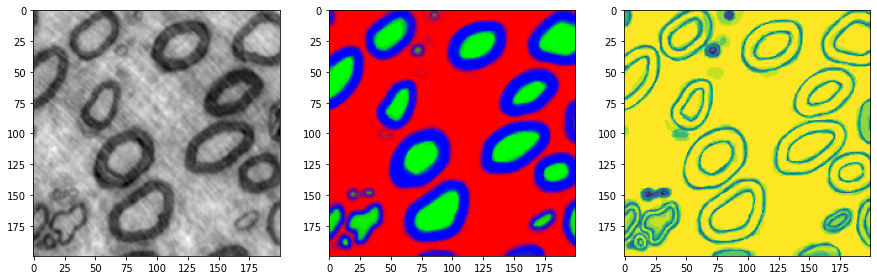

In [55]:
# Visualize variation in labeling.
layers_mean = np.stack(layers).mean(axis=0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(im_org, cmap='gray')
ax[1].imshow(layers_mean)
ax[2].imshow(layers_mean.max(axis=2))
plt.show()